In [45]:
import tensorflow as ts
import pandas as pd
import numpy as np
import seaborn as sn
import os as os
import glob as glob
import re as re
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ttest_ind
from sklearn.preprocessing import StandardScaler

## Read in data

- Read in from ./data directory
    - Expects the name to be in the format of `YYYY data.csv`
    - Add year to data set
- Join together



In [20]:
data = {}
for f in glob.glob("data/*.csv"):
    # find year for each file
    yr = int(f[5:9])
    
    # read in CSV data files
    print(f)
    data[yr] = pd.read_csv(f, index_col=0)

    # add year to current DataFrame
    data[yr]['year'] = yr

data/2014 data.csv
data/2015 data.csv
data/2016 data.csv
data/2017 data.csv
data/2018 data.csv
data/2019 data.csv
data/2021 data.csv


In [24]:
# join datasets together
df = pd.DataFrame()
for k in data.keys():
    df = df.append(data[k])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478 entries, 0 to 67
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Team                             478 non-null    object 
 1   Conference                       478 non-null    object 
 2   Region                           478 non-null    object 
 3   Cinderella                       478 non-null    float64
 4   Conference Tournament Champion   478 non-null    float64
 5   Number of Tournament Wins        478 non-null    float64
 6   Made Tournament Previous Year    478 non-null    float64
 7   Game Count                       478 non-null    float64
 8   Wins                             478 non-null    float64
 9   Losses                           478 non-null    float64
 10  3-Pointers Made                  478 non-null    float64
 11  3-Pointers Attempted             478 non-null    float64
 12  3-Point Percentage     

## Analyze Data

- Look at how Quad 1 Wins/Losses compares to Wins/Losses against Top 25 Teams

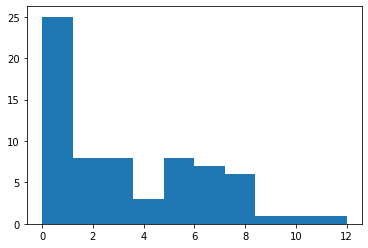

In [51]:
# plt.figure(figsize=(8,6))
plt.hist(df['Quad 1 Wins'])
plt.locator_params(axis='x', nbins=df['Quad 1 Wins'].max())
plt.show()

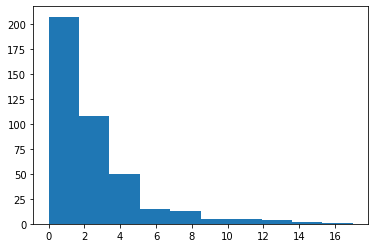

In [54]:
# plt.figure(figsize=(8,6))
plt.hist(df["Wins Against Top 25 RPI Teams"])
plt.locator_params(axis='x', nbins=df['Wins Against Top 25 RPI Teams'].max())
plt.show()

In [34]:
df['Wins Against Top 25 RPI Teams'].describe()

count    410.000000
mean       2.260976
std        2.781829
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       17.000000
Name: Wins Against Top 25 RPI Teams, dtype: float64

In [36]:
df['Quad 1 Wins'].describe()

count    68.000000
mean      3.235294
std       3.129626
min       0.000000
25%       0.000000
50%       3.000000
75%       5.000000
max      12.000000
Name: Quad 1 Wins, dtype: float64

In [44]:
ttest_ind(df.loc[~df['Quad 1 Wins'].isna(),'Quad 1 Wins'], df.loc[~df['Wins Against Top 25 RPI Teams'].isna(),'Wins Against Top 25 RPI Teams'], alternative='larger')

(2.6262174237947327, 0.004456074349035354, 476.0)

## Clean Data

- Apply Standard scaling to all data
- OHE Region
- Drop Conference
- Drop Conference Tournament Champions
- Drop Total Points, Total Opp Points, Total Scoring Differential

### Smaller Model

- Same as above
- Apply PCA to reduce feature count
- Handpick some features

## Create Model

### Neural Network

- Several fully-connected layers

#### Output

##### Win-based

- 7 output nodes, predict number of wins (0-6)
- Apply softmax function at end to get probability

##### Rank-based

- Find the optimal ranking of teams for each year
- 11 output nodes, predict which rank (0-10) the team should be placed in

## Validate Results

- Want to pick several Cinderella teams for bottom 4-6 predictions
